### Statistics in Python - Workshop recording with Meredith

___
##### Setup
+ Import packages
    

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

+ load in data

In [4]:
olympicEvents = pd.read_csv("athlete_events.csv")
olympicEvents.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

+ looks like missing data in Metal column, has names, age, height, weight, country, year, season, etc
___
##### Data Wrangling
+ drop NA, add in place = True to make permanant change
    + drops rows or columns with missing data

In [5]:
olympicEvents.dropna(inplace=True)

___
##### Single Sample t-test
+ Is the average age different from 22?
+ start by testing for assumptions
    + normality / histogram

<AxesSubplot:>

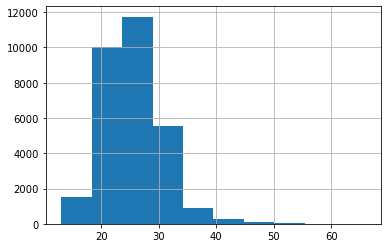

In [6]:
olympicEvents['Age'].hist()

+ looks normal enough so we cwont mess with it. We will learn next lesson what to do when data is not normal.
___
##### Run the Analysis

In [8]:
stats.ttest_1samp(olympicEvents['Age'], 22)

Ttest_1sampResult(statistic=117.96999514411488, pvalue=0.0)

+ 0.0 less than .05, so average age IS different than 22
+ we don't know if higher or lower

In [9]:
olympicEvents.Age.mean()

25.42901162983334

+ surprisingly, higher than 22
____
##### Independent t-test
+ does average age differ between genders (only male/female)
+ women MIGHT have a lower average age
+ test for normality AGAIN

<AxesSubplot:>

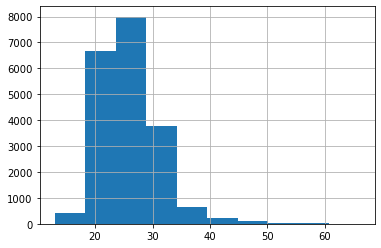

In [11]:
olympicEvents.Age[olympicEvents.Sex == 'M'].hist()

<AxesSubplot:>

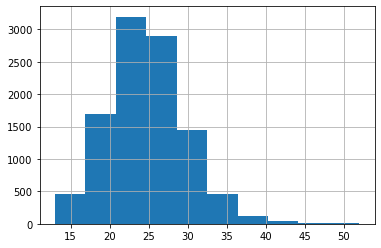

In [13]:
olympicEvents.Age[olympicEvents.Sex == 'F'].hist()

+ both male and female appear to be fairly normally distributed
___
##### Run Analysis

In [15]:
ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'])

Ttest_indResult(statistic=20.811905071131516, pvalue=1.5853311644818236e-95)

+ note scientive notation - NOT 1.5!! Less that .05
+ average age does differ between men and women
+ Let's find out what it differs by!

In [16]:
olympicEvents.groupby('Sex')['Age'].mean()

Sex
F    24.597585
M    25.862942
Name: Age, dtype: float64

+ they are still both over 22, not SO far apart from each other
+ significance is based on sample size
___
##### Independent Chi-Square
+ Does season affect the type of medal? (silver, gold, bronze)


In [18]:
crosstab = pd.crosstab(olympicEvents['Season'],olympicEvents['Medal'])
crosstab

Medal   Bronze  Gold  Silver
Season                      
Summer    8566  8542    8233
Winter    1582  1625    1633

+ Do the porportions/frequencies in each differ?

In [19]:
stats.chi2_contingency(crosstab)

(3.4745101681496746,
 0.17600285120006448,
 2,
 array([[8520.60793214, 8536.56098207, 8283.83108578],
        [1627.39206786, 1630.43901793, 1582.16891422]]))

+ first is chi square value/statistics
+ second is p-value
    + greater than .05, so there is no relationship between the season and the medal
+ bottom is expected value for each cell
___
##### Correlation
+ correlate height and weight



In [20]:
olympicEvents['Height'].corr(olympicEvents['Weight'])

0.8018308248560182

+ gives value between 0 and 1
+ can be positive or negative
+ positive- both go up or both go down together.
+ negative- one goes up as the other goes down
+ .8 is pretty strong correlation, so we can say that height and weight are related

<AxesSubplot:>

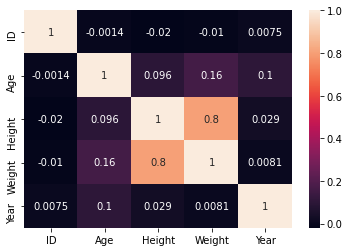

In [21]:
sns.heatmap(olympicEvents.corr(),annot=True)

+ the warmer the color, the more correlation.
+ height and weight are the only correlations here